In [10]:
import torch
import torchaudio
import os
from matplotlib import pyplot as plt

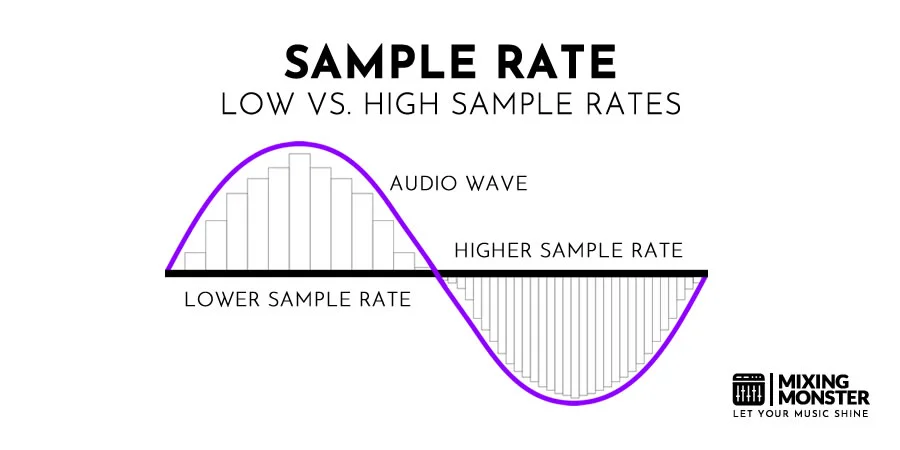
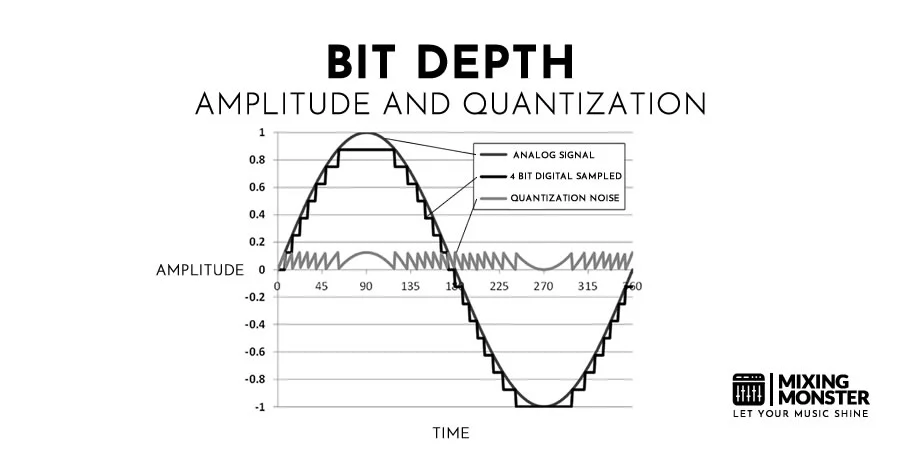

For example, in a digital audio recording, a sample rate of 44.1 kHz and a bit depth of 16 bits means that 44,100 samples are taken per second, and each sample is represented by a 16-bit binary number.

# Settings in Audacity
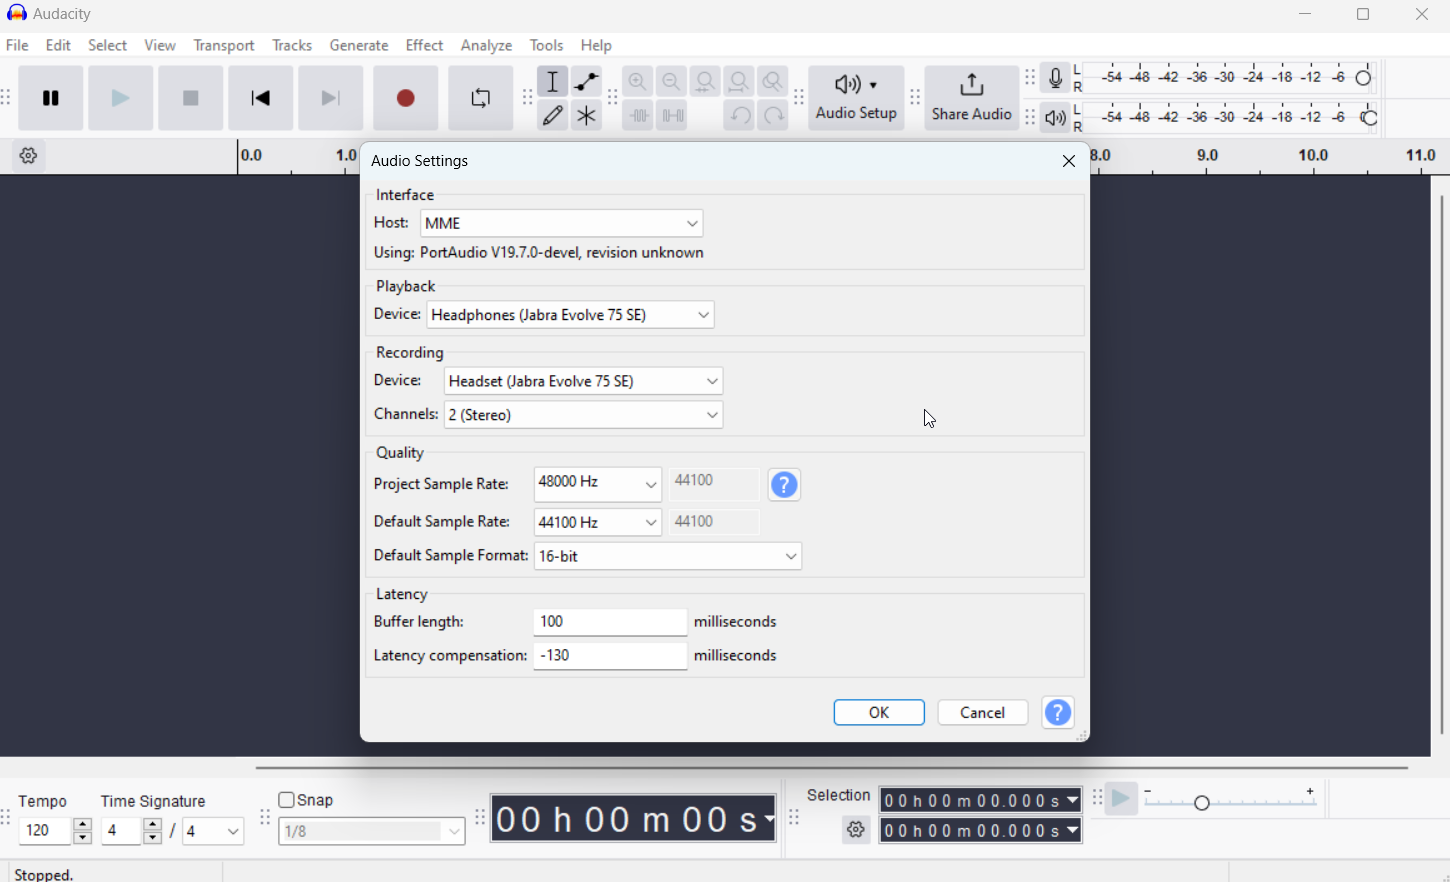

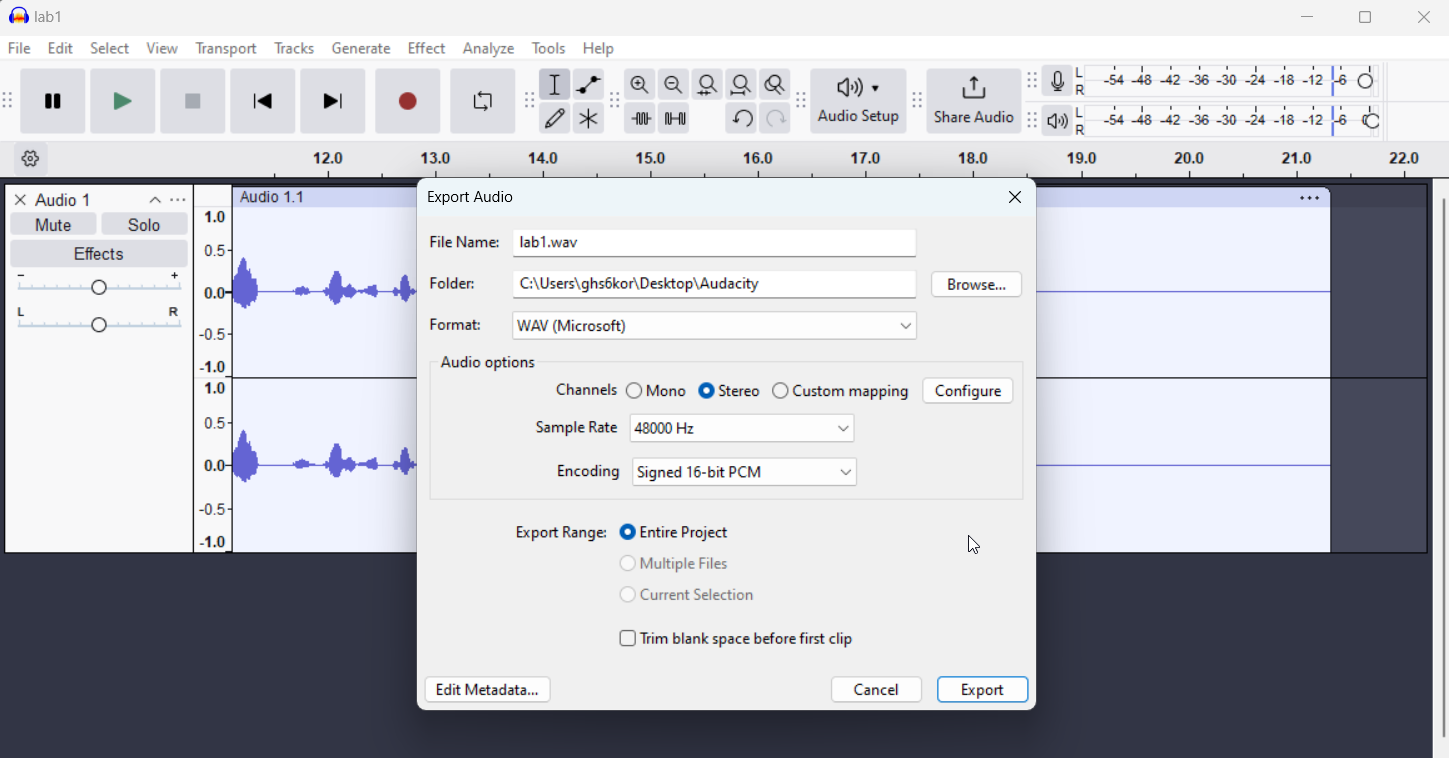

In [11]:
def get_metadata(wav_path):
  metadata = torchaudio.info(wav_path)
  print(metadata)

def wav_read(wav_path):
  wav, fs= torchaudio.load(wav_path)
  if wav.shape[0] > 1:
    wav = wav[0,:]
  return wav, fs

def plot_time_domain(wav):
  # Selecting only one channel
  plt.plot(wav)
  plt.xlabel('time')
  plt.ylabel('amplitude')
  plt.show()

In [12]:
import numpy as np

def fft_plot(wav, start, end, fs):
  frame = wav[int(start*fs):int((end)*fs)]
  N = frame.shape[-1]
  print(frame.shape)
  frame_fft = np.fft.fft(frame)
  frame_fft_abs = np.abs(frame_fft)
  plt.subplot(2,1,1)
  plt.plot(frame)
  plt.xlabel('time')
  plt.ylabel('amplitude')
  plt.subplot(2,1,2)
  x_axis = np.arange(frame.shape[-1]//2) * fs/N
  plt.plot(x_axis, 20*np.log10(frame_fft_abs)[:frame.shape[-1]//2])
  plt.xlabel('frequency')
  plt.ylabel('magnitude')
  plt.show()

AudioMetaData(sample_rate=48000, num_frames=1023696, num_channels=2, bits_per_sample=16, encoding=PCM_S)


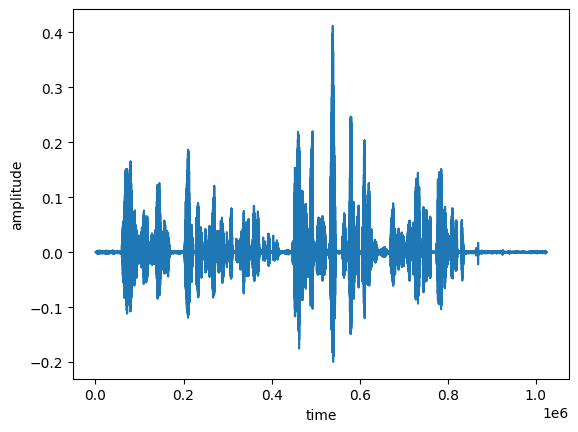

In [13]:
wav_path = "C:\\Users\\ghs6kor\\OneDrive - Bosch Group\\Study\\PhD\\DSP\\Labs\\Lab1\\lab1.wav"
get_metadata(wav_path)
wav, fs = wav_read(wav_path)
plot_time_domain(wav)

# Experiment 1: Vary Sampling Rate
Downsample the original audio file to the following sampling rates while keeping the bit depth fixed at 16 bits:
    - 16000 Hz
    - 8000 Hz
    - 4000 Hz
Listen to each audio file and note the perceptual changes (e.g., clarity, frequency range).

In [14]:
#Saving file
def save_audio(path, wav, fs=16000, bits_per_sample=16):
  torchaudio.save(path, wav.unsqueeze(0), new_fs, bits_per_sample=16)

Downsampled audio saved at: downsampled_audio\audio_16000Hz.wav
torch.Size([160000])


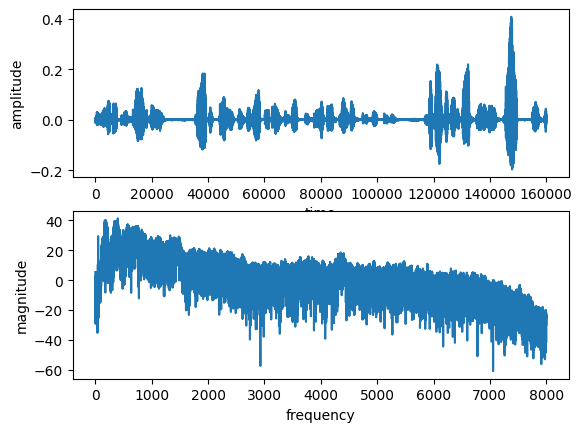

Downsampled audio saved at: downsampled_audio\audio_8000Hz.wav
torch.Size([80000])


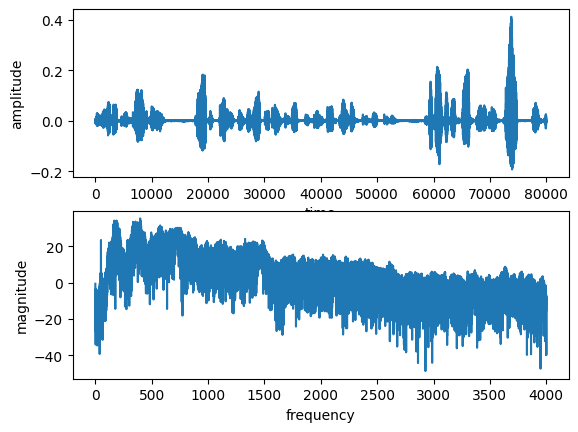

Downsampled audio saved at: downsampled_audio\audio_4000Hz.wav
torch.Size([40000])


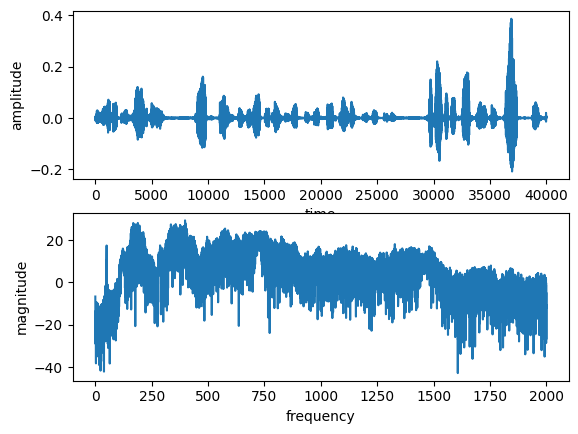

In [15]:
import torchaudio.transforms as T

def resample(wav, original_fs ,new_fs):
  sample_rate = original_fs
  resample_rate = new_fs
  resampler = T.Resample(sample_rate, resample_rate)
  resampled_waveform = resampler(wav)
  return  resampled_waveform, new_fs

# resampling
output_directory = "downsampled_audio"   # Replace with your desired output directory
sampling_rates = [16000, 8000, 4000]     # Sampling rates to test

# Run the downsampling experiment
for sampling_rate in sampling_rates:
  resampled_waveform, new_fs  = resample(wav, fs, new_fs=sampling_rate)
  output_file = os.path.join(output_directory, f"audio_{sampling_rate}Hz.wav")
  save_audio(output_file, resampled_waveform, sampling_rate, 16)
  print(f"Downsampled audio saved at: {output_file}")
  start = 2 #Seconds
  end = 12 #Seconds
  fft_plot(resampled_waveform, start = start, end = end, fs = sampling_rate)

## Changes for each sampling frequency
### Sampling Frequency - 16kHz
- No Frequency loss
- Clarity is high with naturalness for speech. Most speech information are preserved
- Intelligibility - Good
- Tonal Quality - Good
### Sampling Frequency - 8kHz
- High Frequency Loss > 4kHz 
- Clarity is good like mobile phone communication
- Intelligibility - Okay
- Tonal Quality - Okay (not like 16kHz)
### Sampling Frequency - 4 kHz
- High Frequency loss > 2 kHz
- Clarity is not good, naturalness is lost. Speech information is hardly preserved.
- Intelligibility - Not Good
- Tomal Quality - Bad, Muffled



# Experiment 2: Vary Bit Depth
Change the bit depth of the original audio file to the following values while keeping the sampling rate fixed at 16000 Hz:
- 16 bits
- 8 bits
- 1 bit

Listen to each audio file and note the perceptual changes (e.g., dynamic range,noise).

Downsampled audio saved at: downsampled_audio_bit_change\audio_16.wav
torch.Size([160000])


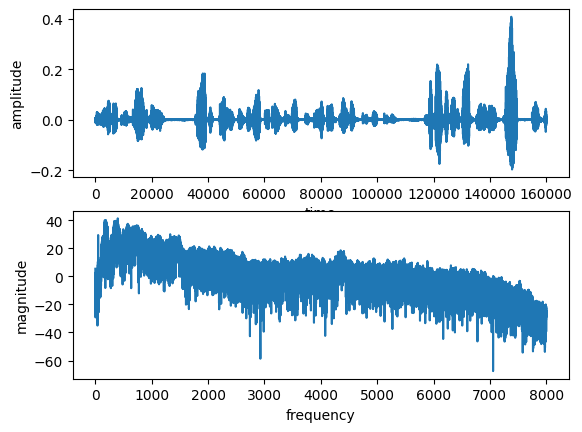

Downsampled audio saved at: downsampled_audio_bit_change\audio_8.wav
torch.Size([160000])


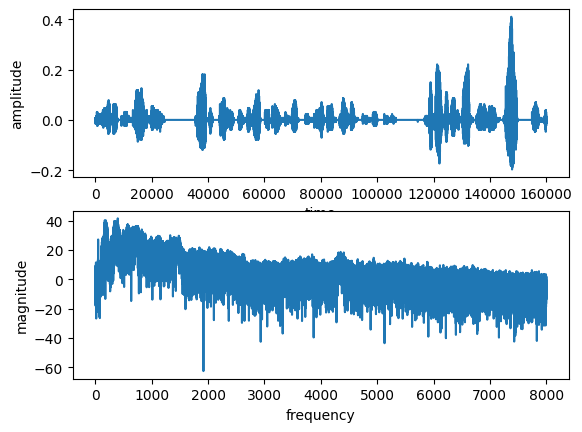

Downsampled audio saved at: downsampled_audio_bit_change\audio_1.wav
torch.Size([160000])


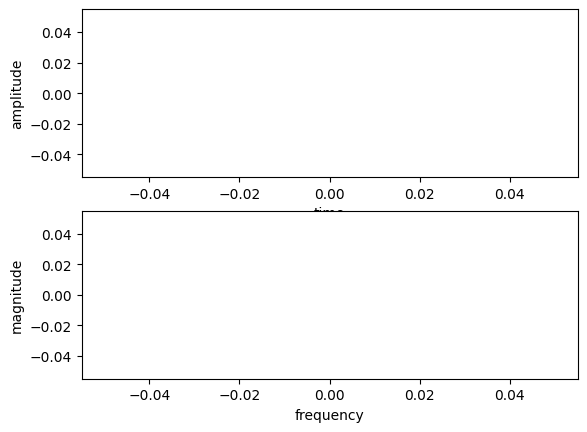

In [16]:
import torchaudio.transforms as T

def resample_bit_change(wav, original_fs ,new_fs, target_bit):
  sample_rate = original_fs
  resample_rate = new_fs
  resampler = T.Resample(sample_rate, resample_rate)
  resampled_waveform = resampler(wav)
  quantization_levels = 2 ** target_bit
  quantized_wav = torch.round(resampled_waveform * (quantization_levels / 2 - 1)) / (quantization_levels / 2 - 1)
  return  quantized_wav, new_fs

# resampling
output_directory = "downsampled_audio_bit_change"   # Replace with your desired output directory
sampling_rate = 16000
bit_vals = [16, 8, 1]
# Run the downsampling experiment
for bit_val in bit_vals:
  resampled_waveform, new_fs  = resample_bit_change(wav, fs, new_fs=sampling_rate, target_bit = bit_val)
  output_file = os.path.join(output_directory, f"audio_{bit_val}.wav")
  save_audio(output_file, resampled_waveform, sampling_rate, bit_val)
  print(f"Downsampled audio saved at: {output_file}")
  start = 2 #Seconds
  end = 12 #Seconds
  fft_plot(resampled_waveform, start = start, end = end, fs = sampling_rate)

## Bit Depth - 16
- Smooth
- High Quality Speech
- Similar to original speech

## Bit Depth - 8
- Reduced Quality
- Noticable noise
## Bit Depth - 1
- Not intelligible
- Silence 
- dithering or noise shaping is not used so may result in silence (Addition of noise to takle quanitization error)


# 4. Visualization Tasks
- Plot the time-domain waveform of the complete original audio file (sampling rate: 48000 Hz, bit depth: 16 bits).
- Select a short segment (e.g., 1 second) from the original audio file and perform
the following:
    - Plot its time-domain waveform.
    - Compute and plot its magnitude spectrum (frequency domain) using the Fast Fourier Transform (FFT).

AudioMetaData(sample_rate=48000, num_frames=1023696, num_channels=2, bits_per_sample=16, encoding=PCM_S)


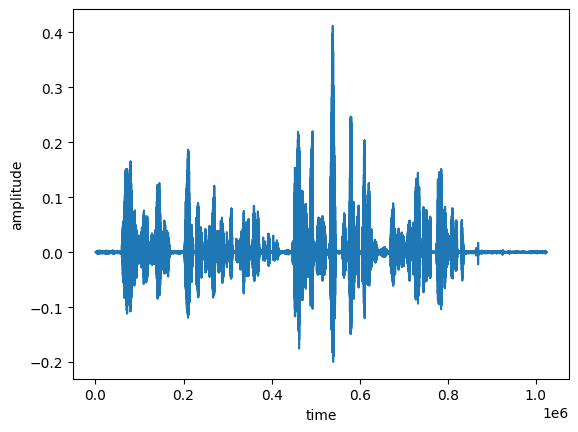

In [17]:
wav_path = "C:\\Users\\ghs6kor\\OneDrive - Bosch Group\\Study\\PhD\\DSP\\Labs\\Lab1\\lab1.wav"
get_metadata(wav_path)
wav, fs = wav_read(wav_path)
plot_time_domain(wav)

torch.Size([48000])


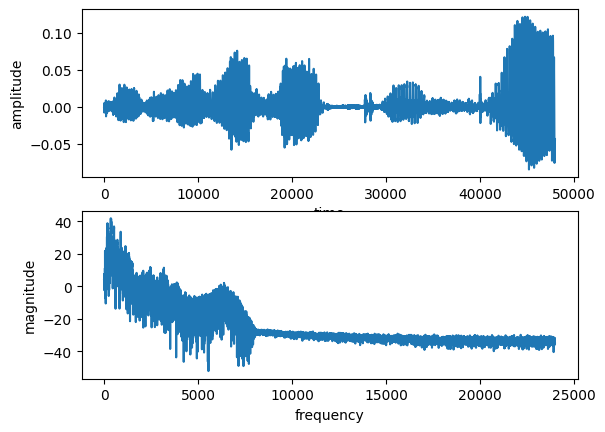

In [20]:
start = 2 #Seconds
end = 3 #Seconds
fft_plot(wav, start = start, end = end, fs = 48000)